In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)

In [8]:
imdb_movies = pd.read_csv("/content/imdb-movies.csv")

In [9]:
correlation = imdb_movies.corr()
correlation

<ipython-input-9-26645e2cac37>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = imdb_movies.corr()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.046393,-0.210298,-0.134597,-0.079851,-0.083099,-0.030157,0.621473,-0.242097,-0.155892
popularity,-0.046393,1.000000,0.559497,0.670072,0.148457,0.795108,0.212036,0.039262,0.534083,0.647132
budget,-0.210298,0.559497,1.000000,0.756780,0.204633,0.663175,0.114837,-0.042366,0.988861,0.714739
revenue,-0.134597,0.670072,0.756780,1.000000,0.169039,0.810370,0.185782,-0.018141,0.739832,0.969940
runtime,-0.079851,0.148457,0.204633,0.169039,1.000000,0.178753,0.136650,-0.112757,0.210478,0.170265
vote_count,-0.083099,0.795108,0.663175,0.810370,0.178753,1.000000,0.261452,0.048188,0.633416,0.777963
vote_average,-0.030157,0.212036,0.114837,0.185782,0.136650,0.261452,1.000000,-0.044808,0.112608,0.187303
release_year,0.621473,0.039262,-0.042366,-0.018141,-0.112757,0.048188,-0.044808,1.000000,-0.112870,-0.088258
budget_adj,-0.242097,0.534083,0.988861,0.739832,0.210478,0.633416,0.112608,-0.112870,1.000000,0.716615
revenue_adj,-0.155892,0.647132,0.714739,0.969940,0.170265,0.777963,0.187303,-0.088258,0.716615,1.000000


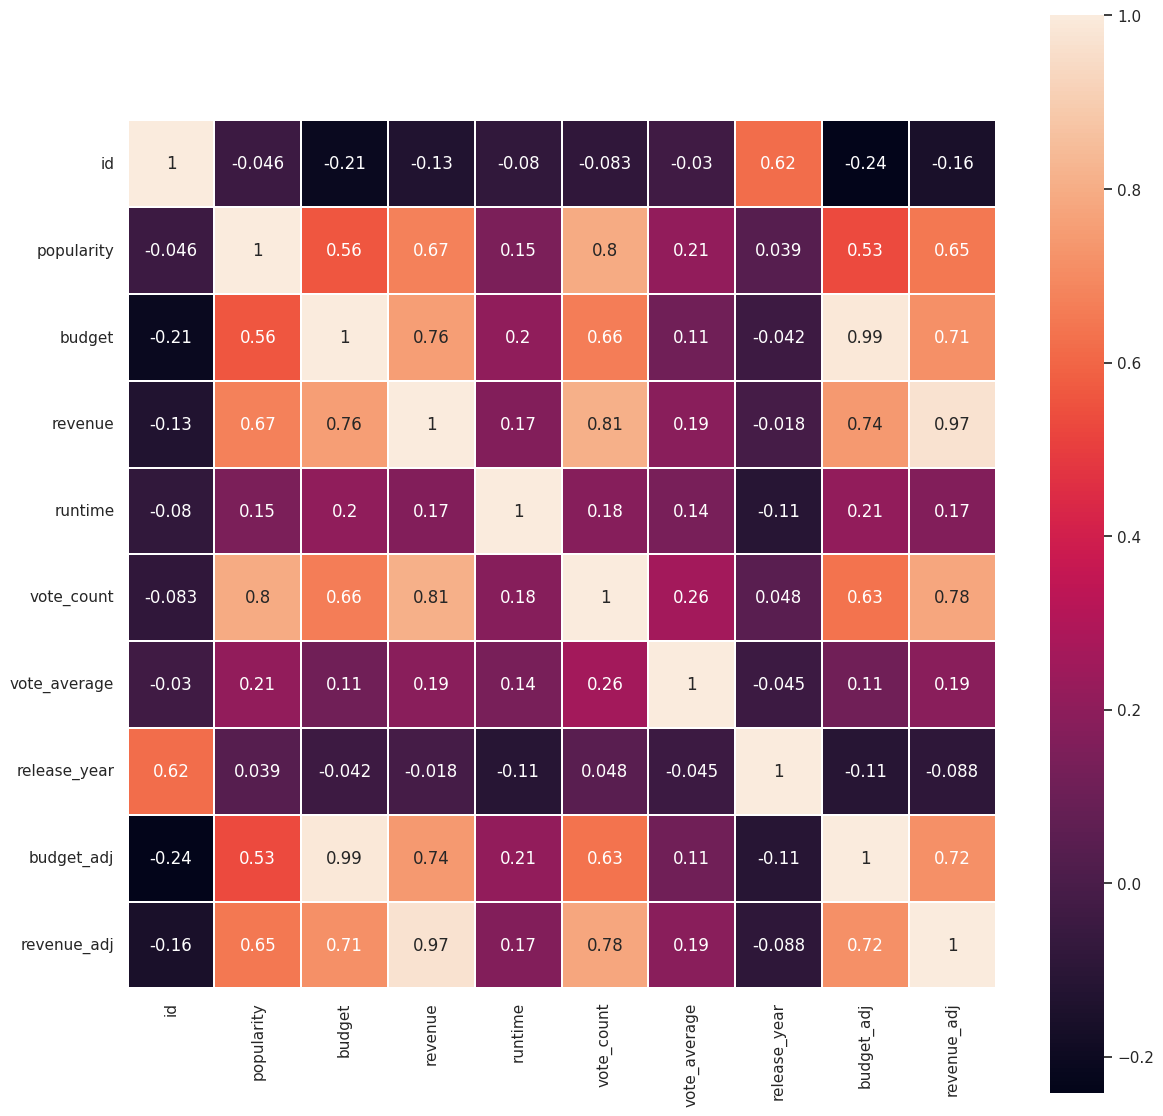

In [10]:
plt.figure(figsize=(14,14))
sns.heatmap(correlation,annot=True,linewidths=0.01,vmax=1,square=True,cbar=True);
?sns.heatmap

<Axes: >

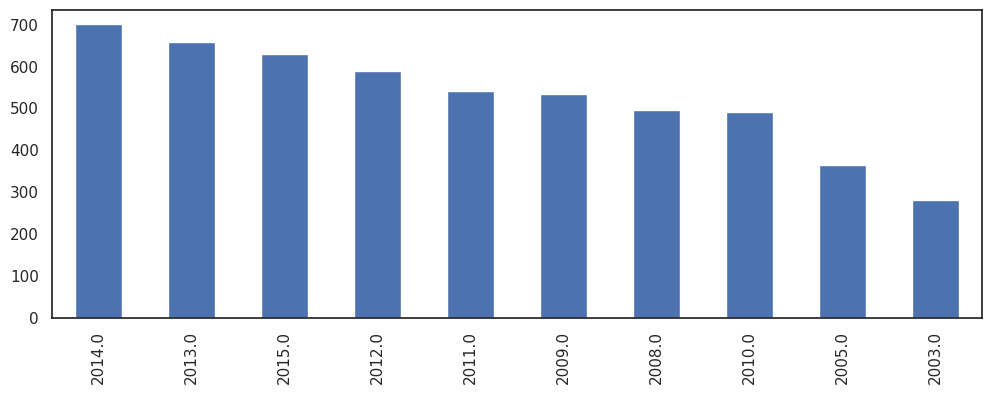

In [11]:
imdb_movies['release_year'].value_counts().head(10).plot.bar(figsize=(12,4))

<Axes: title={'center': 'budget'}, xlabel='vote_average'>

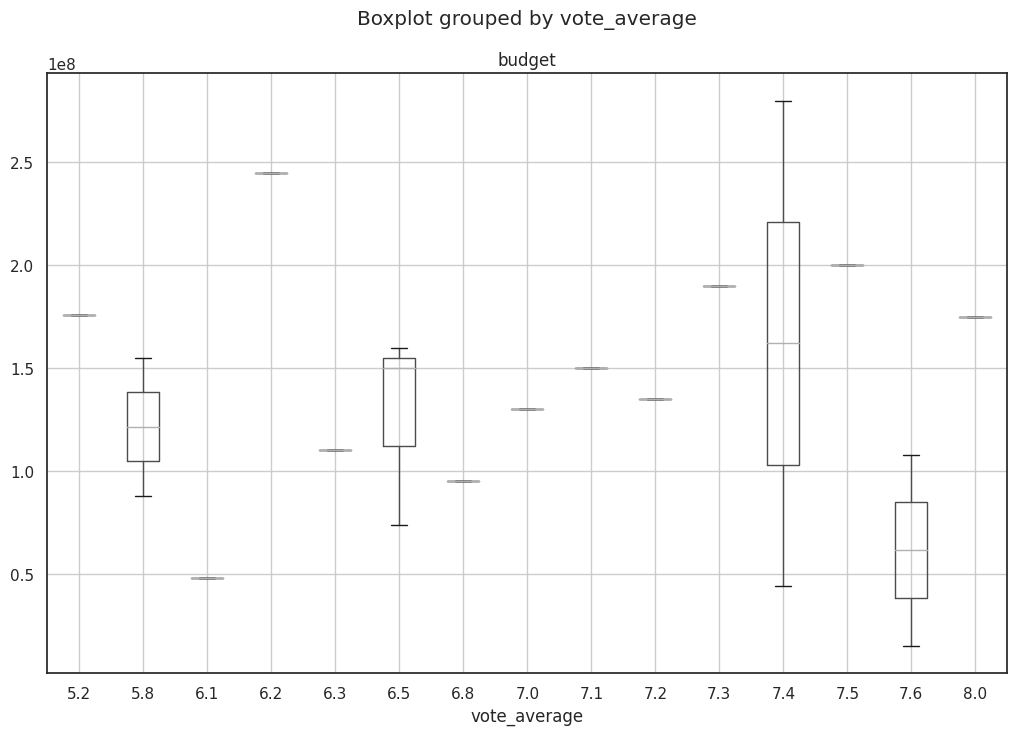

In [12]:
imdb_movies.head(20).boxplot(column='budget', by='vote_average',figsize=(12,8))

<Axes: title={'center': 'revenue'}, xlabel='budget'>

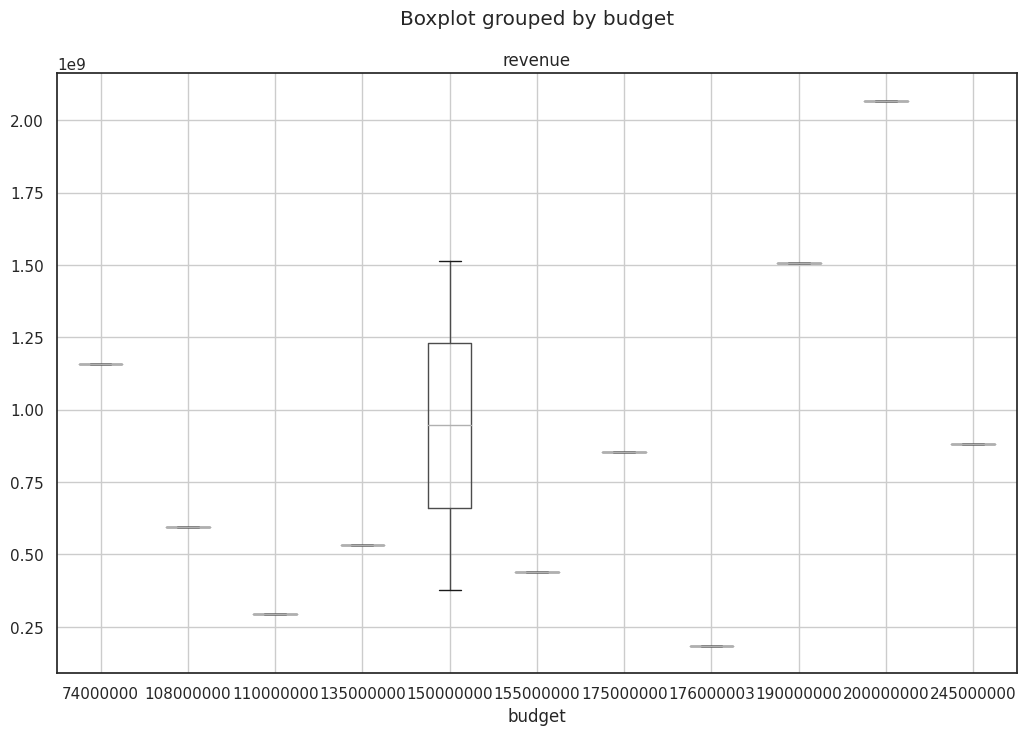

In [13]:
imdb_movies.head(12).boxplot(column='revenue',by='budget',figsize=(12,8))

In [14]:
imdb_movies['profit']=imdb_movies.revenue-imdb_movies.budget

<Axes: xlabel='original_title'>

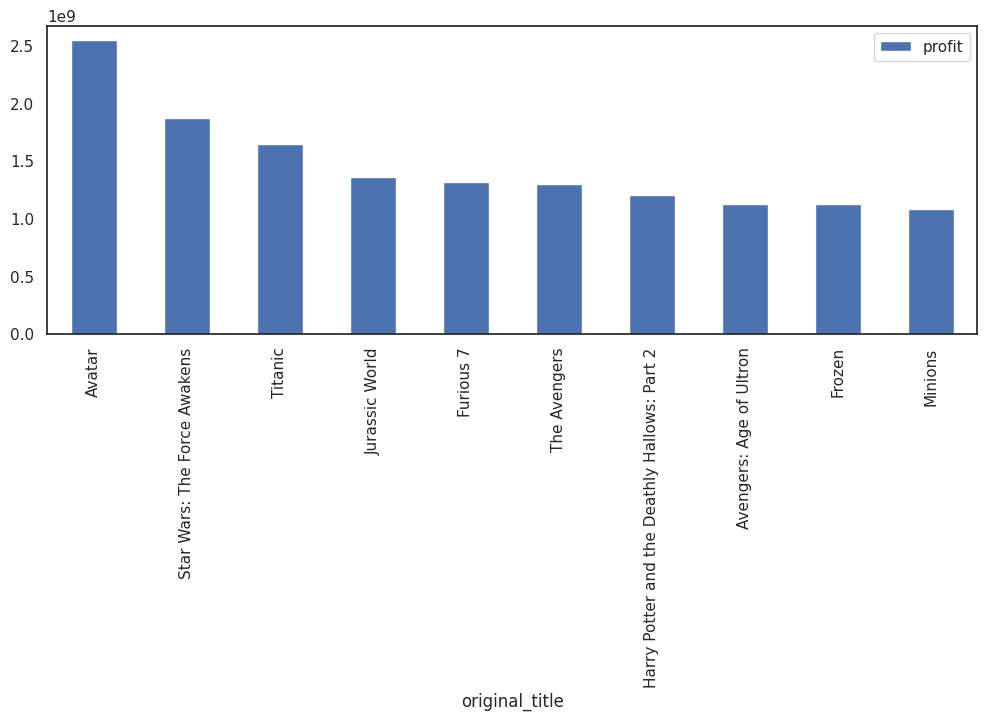

In [15]:
top10 = imdb_movies.nlargest(10,'profit')
top10.index = top10.original_title
top10[['original_title','profit']].plot.bar(figsize=(12,4))

<Axes: >

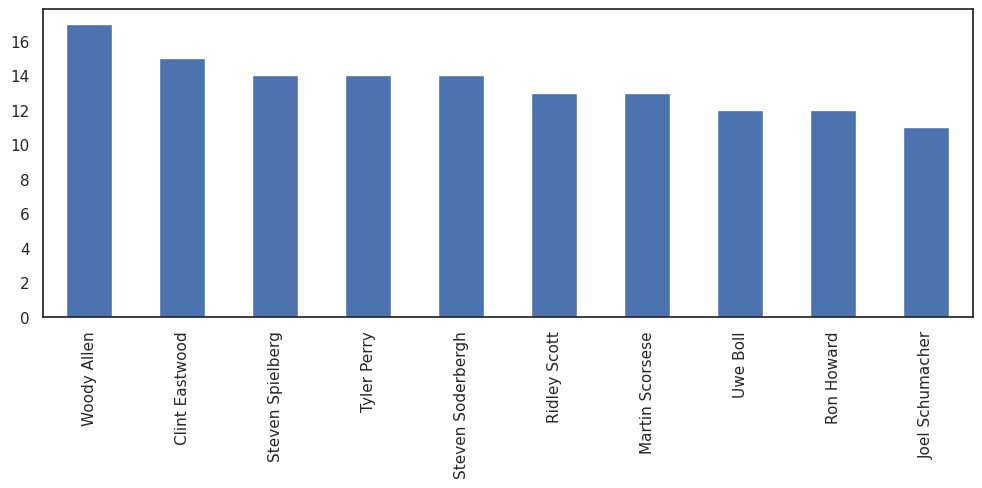

In [16]:
imdb_movies.director.value_counts().head(10).plot.bar(figsize=(12,4))

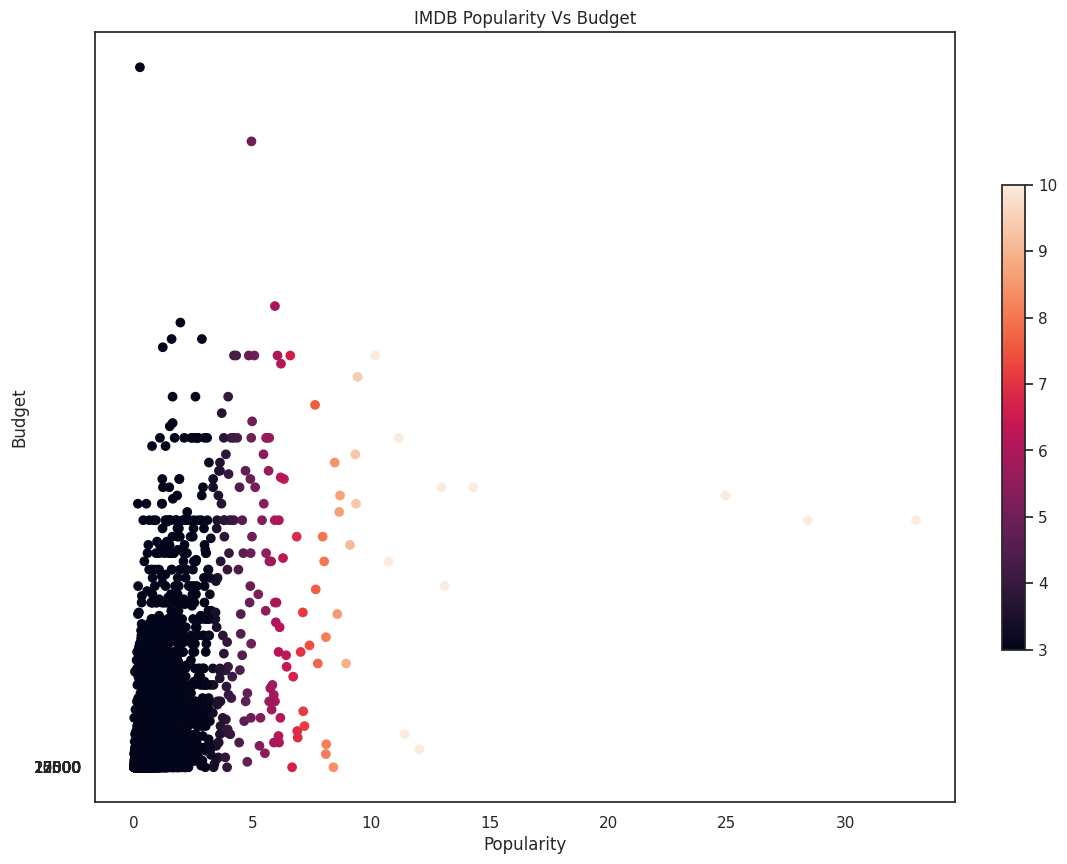

In [17]:
plt.figure(figsize=(12,10))
plt.title("IMDB Popularity Vs Budget")
plt.xlabel("Popularity")
plt.ylabel("Budget")
tmp=plt.scatter(imdb_movies.popularity,imdb_movies.budget,c=imdb_movies.popularity,vmin=3,vmax=10)
plt.yticks([i*2500 for i in range(11)])
plt.colorbar(tmp,fraction=.025)
plt.show()

In [18]:
top20ProfitMovies = imdb_movies.nlargest(20,'profit')

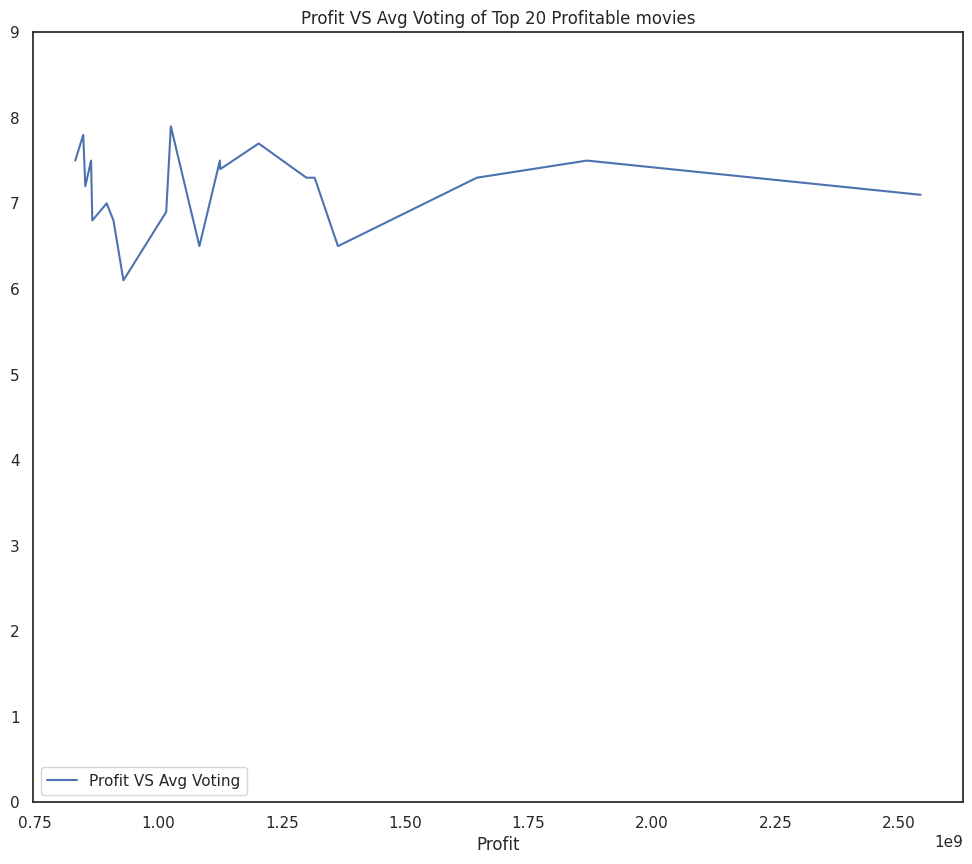

In [19]:
plt.figure(figsize=(12,10))
plt.title("Profit VS Avg Voting of Top 20 Profitable movies")
plt.xlabel('Profit')
plt.plot(top20ProfitMovies.profit,top20ProfitMovies.vote_average)
plt.legend(['Profit VS Avg Voting'],loc='lower left')
plt.yticks(range(10))
plt.show()

In [20]:
arrayGenres = []
for i in imdb_movies.genres:
    if type(i) == str:
        for x in i.split('|'):
            arrayGenres.append(x)

In [21]:
from collections import Counter
dicGenresWithCounts = Counter(arrayGenres)

Text(0, 0.5, 'No of movies released')

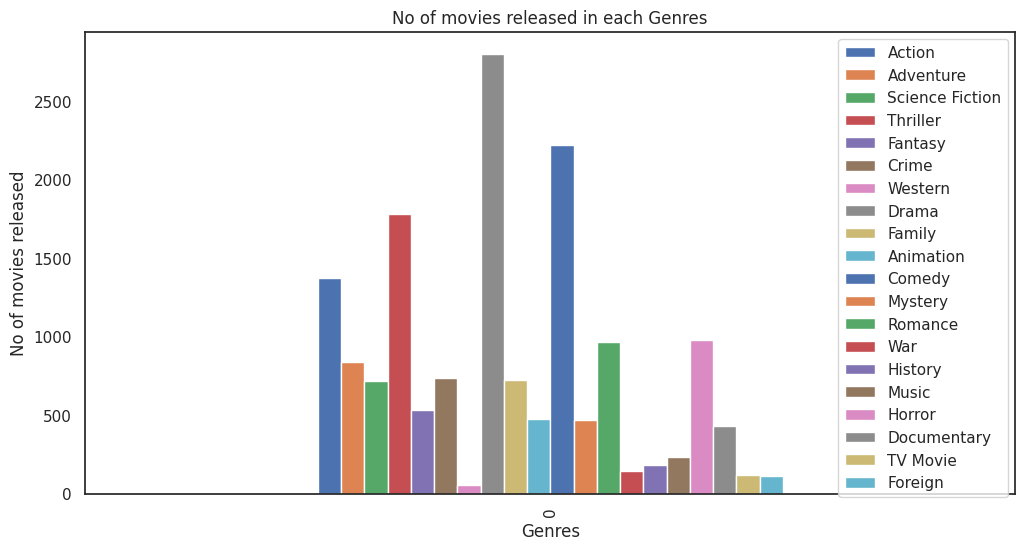

In [22]:
df=pd.DataFrame.from_dict([dicGenresWithCounts.values()])
df.columns=list(dicGenresWithCounts.keys())
df.plot.bar(figsize=(12,6))
plt.title("No of movies released in each Genres")
plt.xlabel("Genres")
plt.ylabel("No of movies released")

<Axes: ylabel='director'>

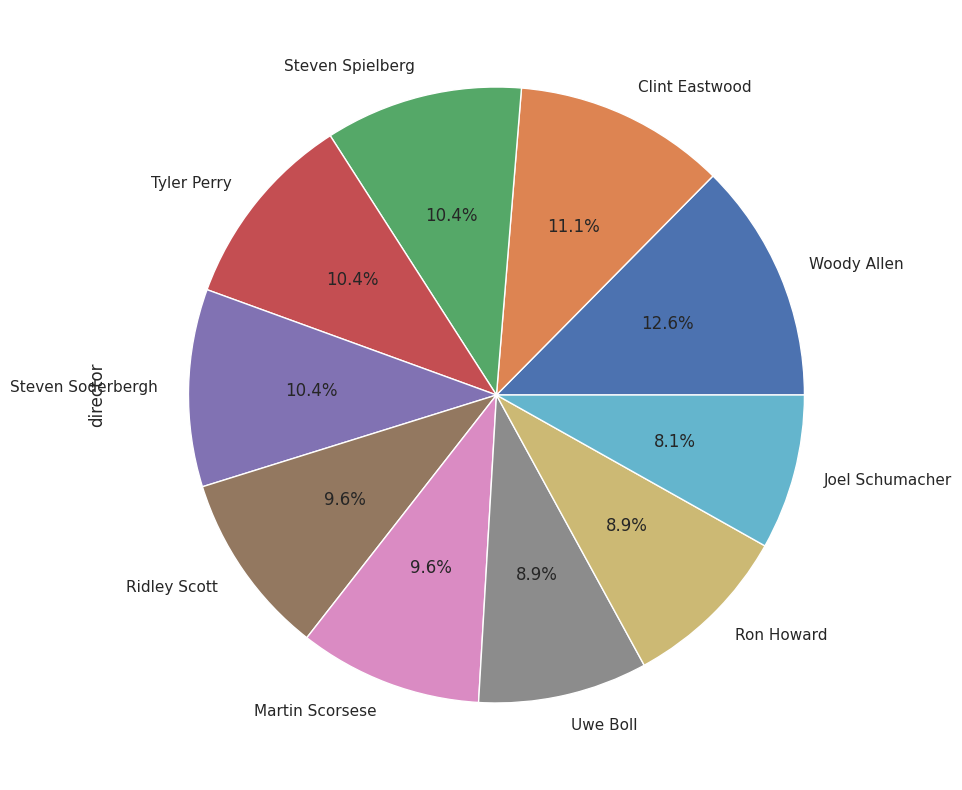

In [23]:
imdb_movies.director.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))

Text(0, 0.5, 'No of movies released')

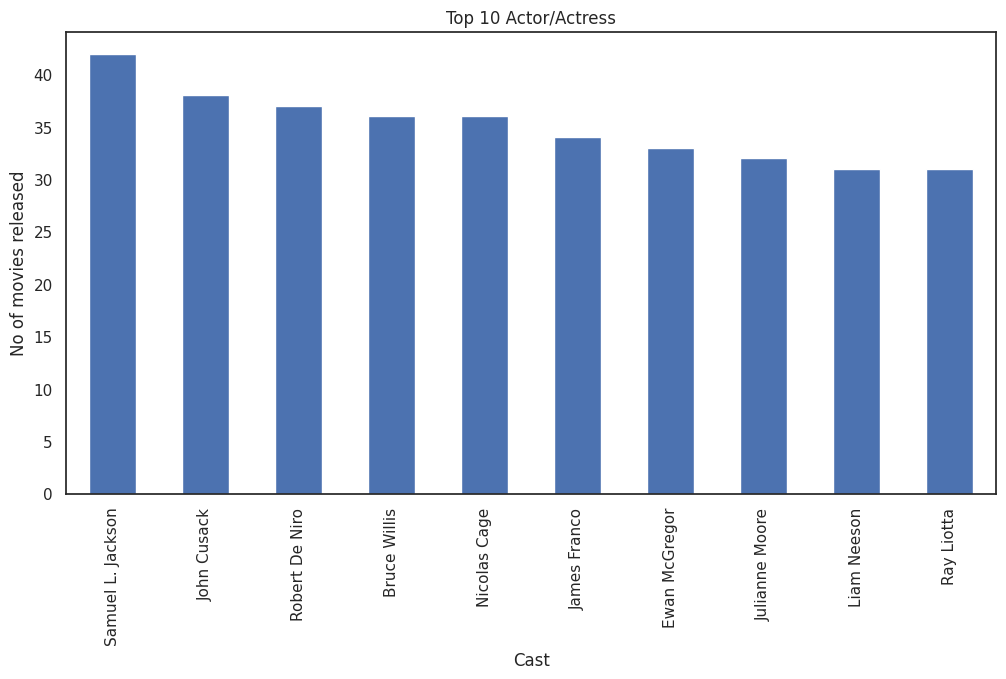

In [24]:
arrayCast = []
for i in imdb_movies.cast:
    if type(i) == str:
        for x in i.split('|'):
            arrayCast.append(x)
dicCastWithCounts = Counter(arrayCast)
df_Cast=pd.DataFrame(data={'Cast':list(dicCastWithCounts.keys()),'Count':list(dicCastWithCounts.values())}).sort_values(by='Count',ascending=False)
df_Cast.index = df_Cast.Cast
df_Cast.Count.head(10).plot.bar(figsize=(12,6))
plt.title("Top 10 Actor/Actress")
plt.xlabel("Cast")
plt.ylabel("No of movies released")

<Axes: ylabel='Count'>

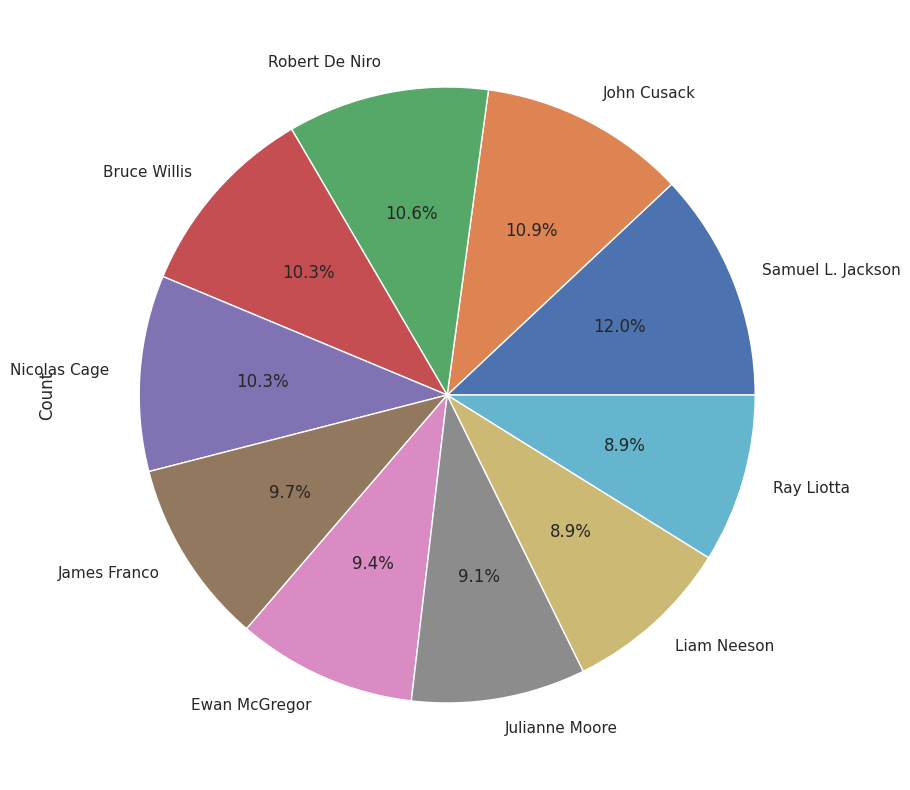

In [25]:
df_Cast.Count.head(10).plot.pie(autopct='%1.1f%%',figsize=(10,10))

In [26]:
imdb_movies['IsProfitable'] = imdb_movies.profit>(imdb_movies.budget*2)

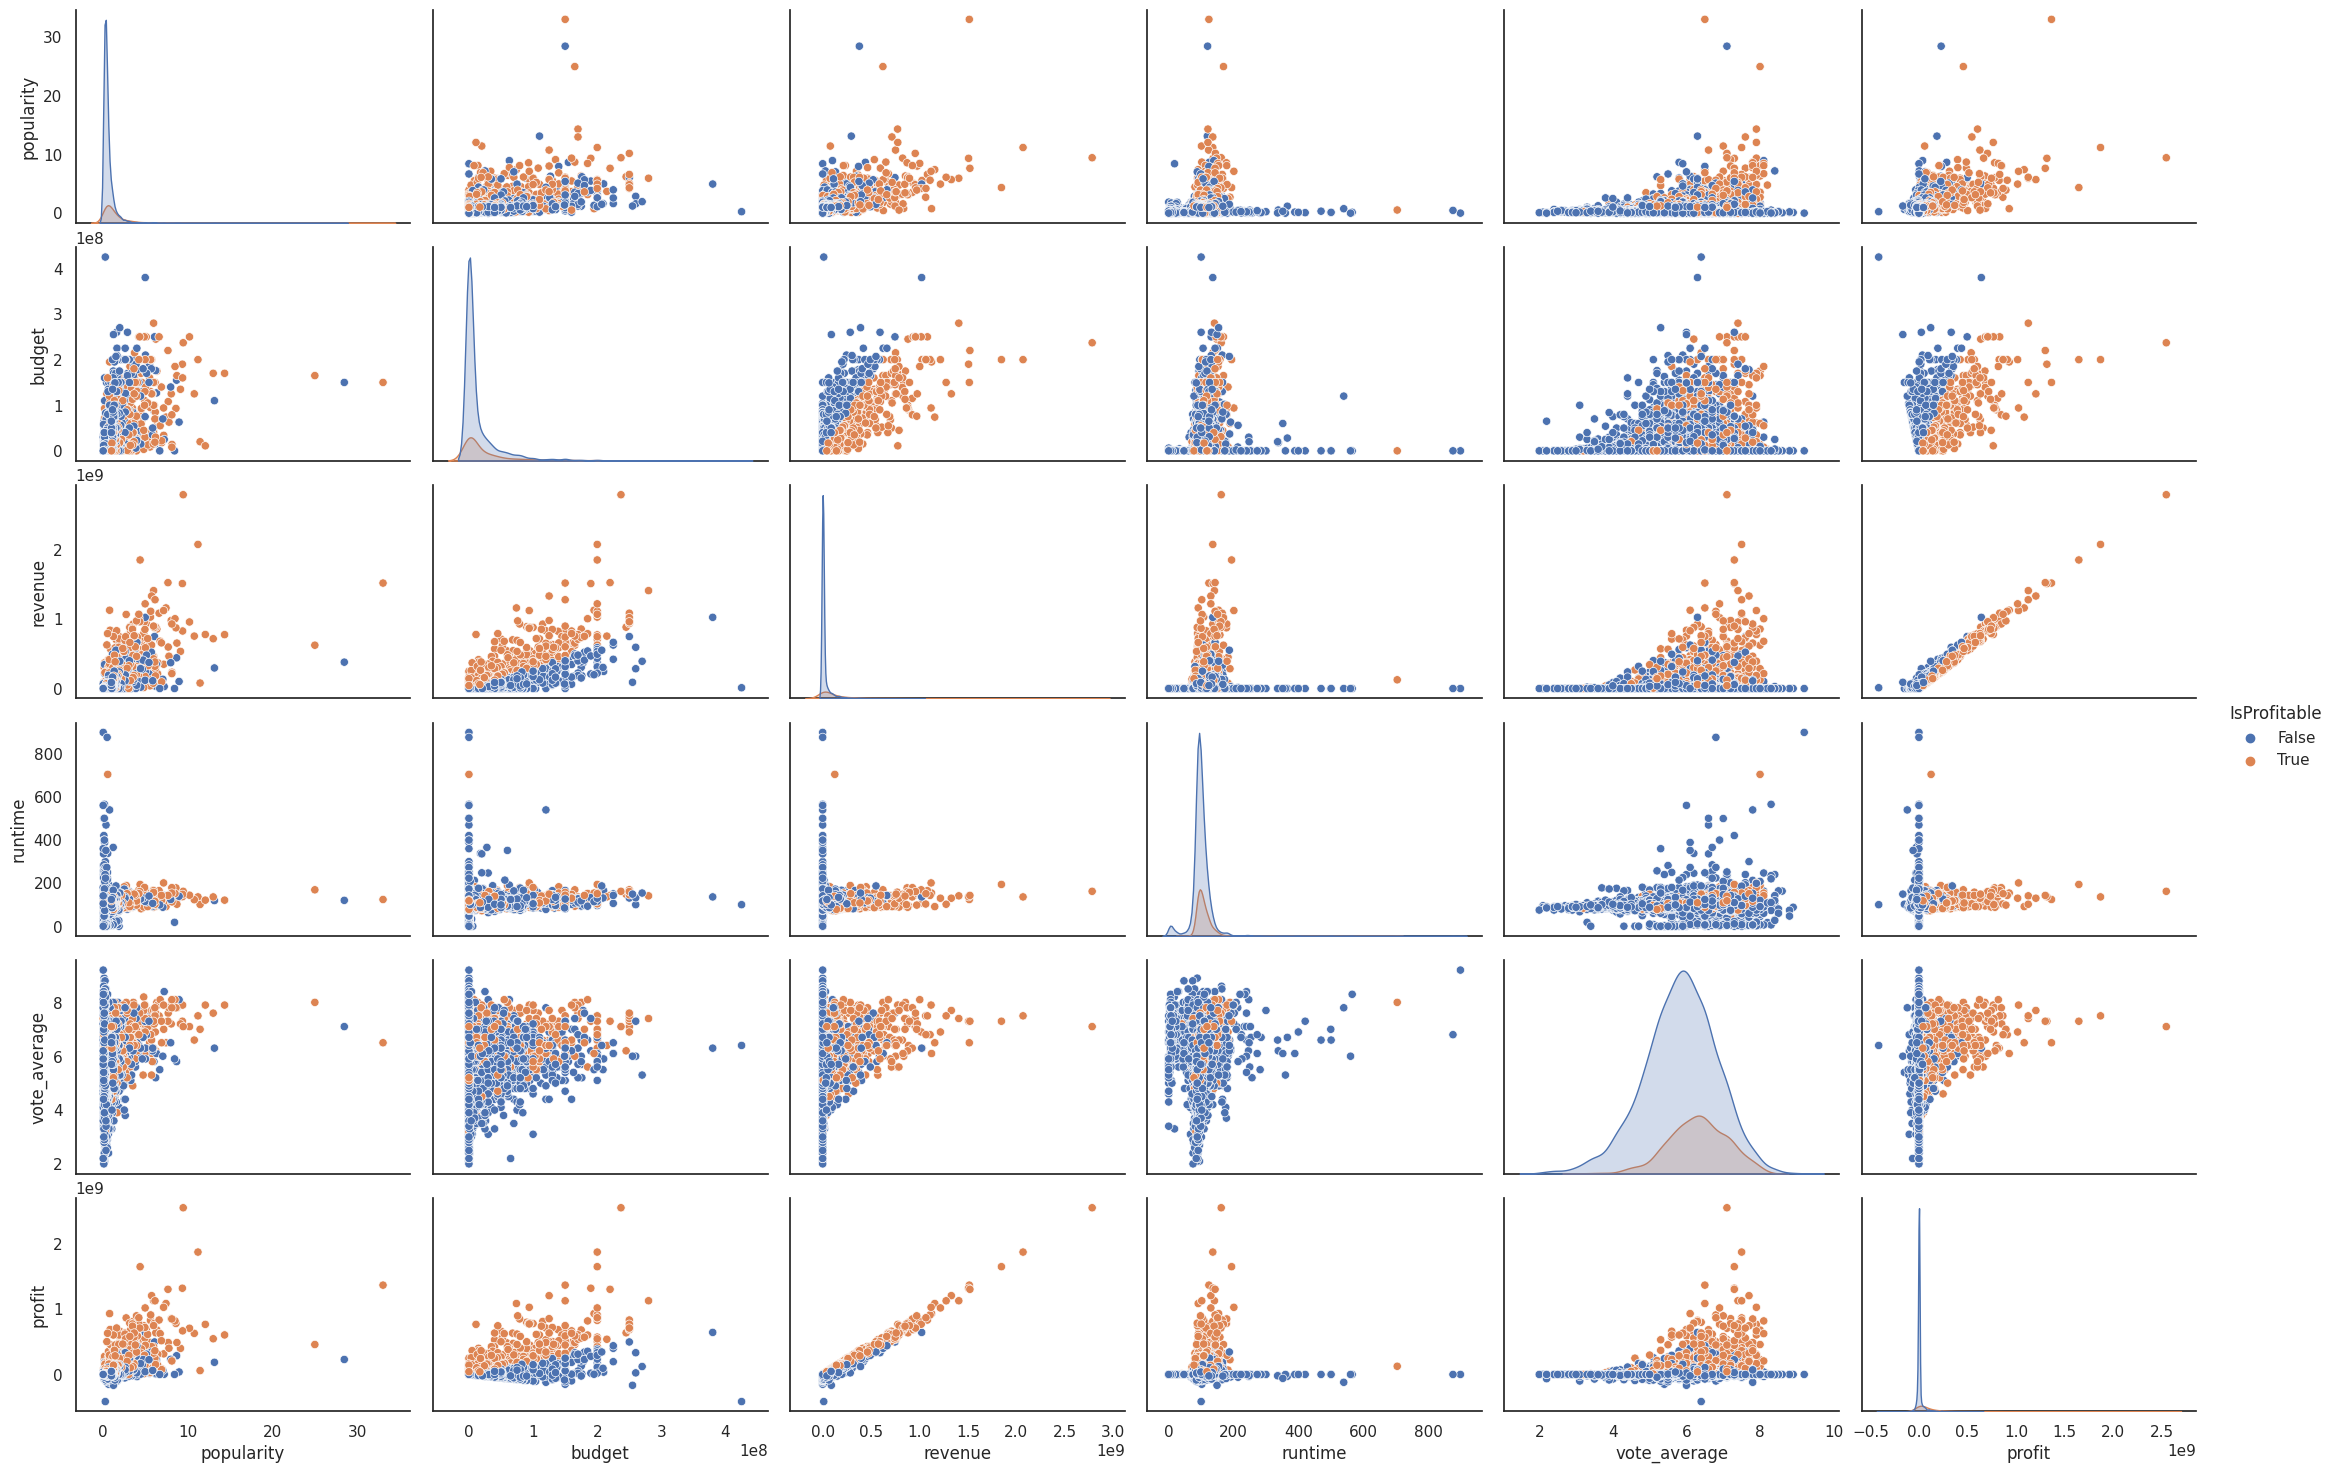

In [27]:
df_imp_data = imdb_movies.drop(['id','imdb_id','homepage', 'tagline','cast','keywords','overview','genres','production_companies','release_date','budget_adj','revenue_adj','release_year','original_title','vote_count','director'], axis=1)
df_imp_data
sns.pairplot(df_imp_data, hue='IsProfitable', aspect=1.5)
plt.show()